In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import os 
import re
import yaml

In [2]:
data_dir = "../data/raw"
csv_files = os.listdir(data_dir)


In [3]:
full_path_csv_files = [os.path.abspath(f"../data/raw/{csv_file}") for csv_file in csv_files]


In [4]:
full_path_csv_files


['/home/pradeep/HDB-Resale-Prices-Analysis/data/raw/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv',
 '/home/pradeep/HDB-Resale-Prices-Analysis/data/raw/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv',
 '/home/pradeep/HDB-Resale-Prices-Analysis/data/raw/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv',
 '/home/pradeep/HDB-Resale-Prices-Analysis/data/raw/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv',
 '/home/pradeep/HDB-Resale-Prices-Analysis/data/raw/Resale flat prices based on registration date from Jan-2017 onwards.csv']

In [5]:
dfs = [pd.read_csv(file) for file in full_path_csv_files]


In [6]:
dfs[0].head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [7]:
dfs[-1].head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [8]:
dfs[0].shape


(37153, 11)

In [9]:
total_number_of_records = 0
num_cols=11
idxs_with_diff_cols = []
idxs_with_same_cols = []
for i, df in enumerate(dfs): 
    records = df.shape[0]
    total_number_of_records += records
    cols = df.shape[1]
    if cols != num_cols: 
        print(f"Dataframe {i} has different numbert of columns, {cols}")
        idxs_with_diff_cols.append(i)
    else:
        idxs_with_same_cols.append(i) 


Dataframe 1 has different numbert of columns, 10
Dataframe 2 has different numbert of columns, 10
Dataframe 3 has different numbert of columns, 10


In [10]:
transformed_dfs = []
for i, df in enumerate(dfs): 
    df["year"] = df["month"].apply(lambda x: int(x.split("-")[0]))
    df["month"] = df["month"].apply(lambda x: int(x.split("-")[1]))
    df["remaining_lease"] = (99 - (df["year"] - df["lease_commence_date"])) + (1-df["month"]/12) 
    new_order = ["year", "month", "town", "flat_type", "block", "street_name", "storey_range", "floor_area_sqm", "flat_model", "lease_commence_date", "remaining_lease", "resale_price"]
    transformed_dfs.append(df[new_order])


In [11]:
total_number_of_records


963149

In [12]:
transformed_dfs[1].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 369651 non-null  int64  
 1   month                369651 non-null  int64  
 2   town                 369651 non-null  object 
 3   flat_type            369651 non-null  object 
 4   block                369651 non-null  object 
 5   street_name          369651 non-null  object 
 6   storey_range         369651 non-null  object 
 7   floor_area_sqm       369651 non-null  float64
 8   flat_model           369651 non-null  object 
 9   lease_commence_date  369651 non-null  int64  
 10  remaining_lease      369651 non-null  float64
 11  resale_price         369651 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 33.8+ MB


In [13]:
transformed_dfs[0].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 37153 non-null  int64  
 1   month                37153 non-null  int64  
 2   town                 37153 non-null  object 
 3   flat_type            37153 non-null  object 
 4   block                37153 non-null  object 
 5   street_name          37153 non-null  object 
 6   storey_range         37153 non-null  object 
 7   floor_area_sqm       37153 non-null  float64
 8   flat_model           37153 non-null  object 
 9   lease_commence_date  37153 non-null  int64  
 10  remaining_lease      37153 non-null  float64
 11  resale_price         37153 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 3.4+ MB


In [14]:
resale_df = pd.DataFrame()
for df in transformed_dfs: 
    resale_df = pd.concat((resale_df, df))


In [15]:
resale_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 963149 entries, 0 to 216945
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 963149 non-null  int64  
 1   month                963149 non-null  int64  
 2   town                 963149 non-null  object 
 3   flat_type            963149 non-null  object 
 4   block                963149 non-null  object 
 5   street_name          963149 non-null  object 
 6   storey_range         963149 non-null  object 
 7   floor_area_sqm       963149 non-null  float64
 8   flat_model           963149 non-null  object 
 9   lease_commence_date  963149 non-null  int64  
 10  remaining_lease      963149 non-null  float64
 11  resale_price         963149 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 95.5+ MB


In [16]:
resale_df.describe()


,year,month,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,963149.000000,963149.000000,963149.000000,963149.000000,963149.000000,9.631490e+05
mean,2006.855550,6.557523,95.670257,1988.652017,81.250007,3.327063e+05
std,9.787654,3.398911,25.758293,11.036146,11.029144,1.819522e+05
min,1990.000000,1.000000,28.000000,1966.000000,40.500000,5.000000e+03
25%,1999.000000,4.000000,73.000000,1981.000000,74.166667,1.980000e+05
50%,2005.000000,7.000000,93.000000,1986.000000,83.166667,3.050000e+05
75%,2015.000000,9.000000,113.000000,1996.000000,90.333333,4.300000e+05
max,2025.000000,12.000000,366.700000,2022.000000,101.583333,1.658888e+06


In [17]:
outliers = resale_df[resale_df["remaining_lease"]>99]


In [18]:
outliers


,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
157846,2004,9,BUKIT MERAH,4 ROOM,112A,DEPOT RD,22 TO 24,100.0,Model A,2006,101.250000,348000.0
162626,2004,11,BUKIT MERAH,4 ROOM,109B,DEPOT RD,25 TO 27,100.0,Model A,2006,101.083333,358000.0
167746,2005,1,BUKIT MERAH,5 ROOM,111A,DEPOT RD,22 TO 24,115.0,Improved,2006,100.916667,388000.0
167747,2005,1,BUKIT MERAH,5 ROOM,112B,DEPOT RD,22 TO 24,116.0,Improved,2006,100.916667,378000.0
172832,2005,3,BUKIT MERAH,4 ROOM,8B,BOON TIONG RD,13 TO 15,100.0,Model A,2005,99.750000,410000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
125037,1996,5,TAMPINES,5 ROOM,351,TAMPINES ST 33,04 TO 06,125.0,IMPROVED,1996,99.583333,385000.0
125066,1996,5,TAMPINES,EXECUTIVE,497D,TAMPINES ST 45,01 TO 03,144.0,PREMIUM APARTMENT,1996,99.583333,780000.0
125067,1996,5,TAMPINES,EXECUTIVE,497F,TAMPINES ST 45,04 TO 06,144.0,PREMIUM APARTMENT,1996,99.583333,745000.0
126051,1996,6,BEDOK,5 ROOM,660,JLN TENAGA,01 TO 03,138.0,MODEL A,1997,100.500000,575000.0


<Axes: xlabel='resale_price', ylabel='Count'>

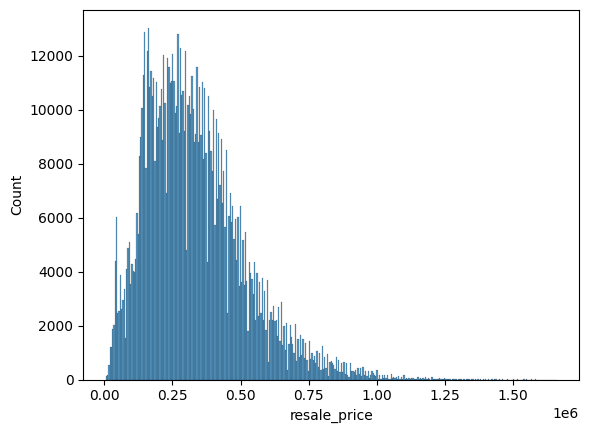

In [19]:
sns.histplot(data=resale_df, x="resale_price")


<Axes: xlabel='resale_price', ylabel='Count'>

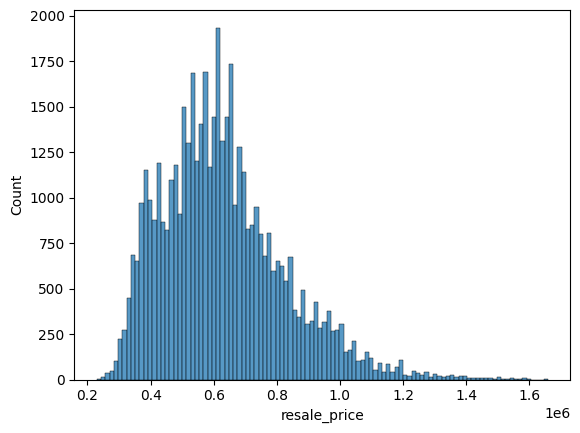

In [20]:
recent_df = resale_df[resale_df["year"]>2023]
sns.histplot(data=recent_df, x="resale_price")


In [21]:
resale_df.sort_values(by="year", inplace=True)
resale_df.reset_index(drop=True, inplace=True)
# resale_df.to_csv("../data/resale_df.csv", index=False)


In [22]:
resale_df.head()


,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990,1,ANG MO KIO,4 ROOM,428,ANG MO KIO AVE 3,10 TO 12,92.0,NEW GENERATION,1978,87.916667,75000.0
1,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86.916667,9000.0
2,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,86.916667,6000.0
3,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86.916667,8000.0
4,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,86.916667,6000.0


In [23]:
resale_flat_typ = resale_df.pivot_table(index="year", columns="flat_type", values="resale_price", aggfunc="mean")


In [24]:
resale_flat_typ.head()


flat_type,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION,MULTI-GENERATION
year,,,,,,,,
1990,7890.540541,19571.097561,42618.447941,81765.902696,132614.605746,186458.267898,NaN,NaN
1991,8501.568627,21257.811159,44479.893433,81799.517474,138102.878338,191166.849315,165000.000000,NaN
1992,9648.979592,22828.472222,48173.884642,90928.365347,154383.896245,213970.979592,226586.363636,NaN
1993,17634.615385,35625.552408,71018.616862,134510.933517,227253.050118,296455.337877,293700.000000,NaN
1994,24824.691358,45405.502392,94328.029085,175071.872686,284071.676130,367723.477688,398702.702703,NaN


In [25]:
resale_town = resale_df.pivot_table(index="year", columns="town", values="resale_price", aggfunc="mean")
resale_town.fillna(0, inplace=True)
resale_town.head()


town,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
year,,,,,,,,,,,,,,,,,,,,,
1990,59264.292383,70226.199678,92737.735849,87756.431611,65934.881690,0.000000,76189.285714,64527.600000,57219.090909,73046.287770,...,0.000000,0.0,38597.337662,21300.0,40850.000000,101877.843590,86057.553444,53897.503356,45763.881579,66481.167224
1991,58368.396648,73469.866995,112779.957198,83732.848629,74446.499239,97090.909091,88065.000000,66524.410256,58852.857143,70065.984615,...,103666.666667,0.0,44172.558140,24600.0,41941.666667,95313.323877,98906.176471,57541.234940,50041.088435,71194.092277
1992,65069.577689,78838.286164,151646.058981,94477.639198,79939.112782,101058.947368,98275.000000,74124.861878,71400.793651,81545.074627,...,167388.333333,0.0,48501.906977,31500.0,48970.000000,115454.980926,98337.241958,68570.027211,50078.951311,85028.510079
1993,104482.918188,115705.023518,222452.235772,139429.915966,122149.141762,160210.276074,197329.306667,102984.210526,124891.224490,122725.905072,...,256172.566372,0.0,79773.629581,72000.0,59000.000000,157812.351598,151609.720919,112423.296970,84082.443820,151487.683197
1994,133834.338350,159450.627266,268096.594030,165701.628468,152160.865503,200371.280201,296927.480916,129842.035398,213811.421569,149224.743902,...,257596.586345,0.0,101354.050686,0.0,73000.000000,200694.857143,205908.480380,148795.955939,136473.598425,180120.673220


Text(0, 0.5, 'Resale_price')

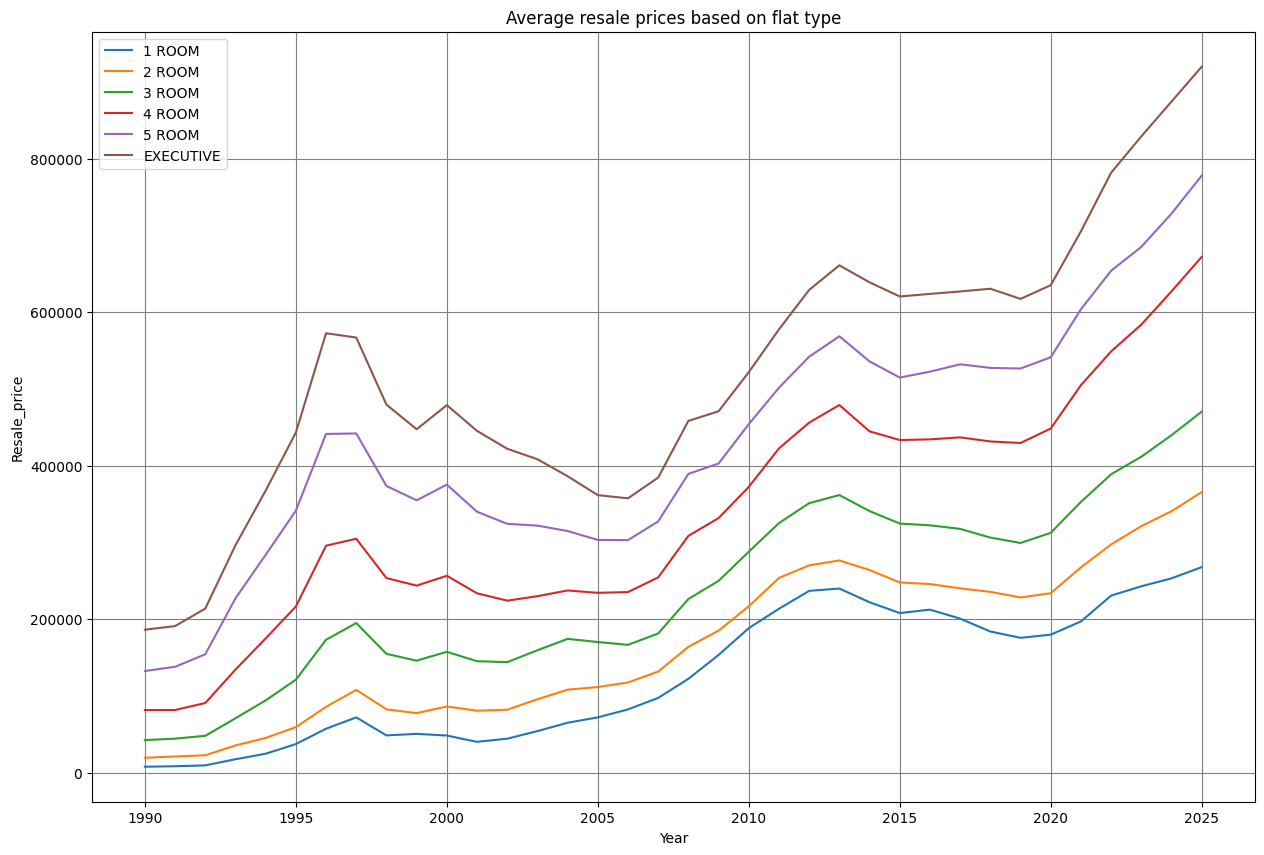

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
rooms = list(resale_flat_typ.columns)[0:-2]
for r in rooms:
    sns.lineplot(data=resale_flat_typ, x="year", y=r, ax=ax, label=r)
ax.legend()
ax.grid(True, color="grey")
ax.set_title("Average resale prices based on flat type")
ax.set_xlabel("Year")
ax.set_ylabel("Resale_price")


Text(0, 0.5, 'Resale_price')

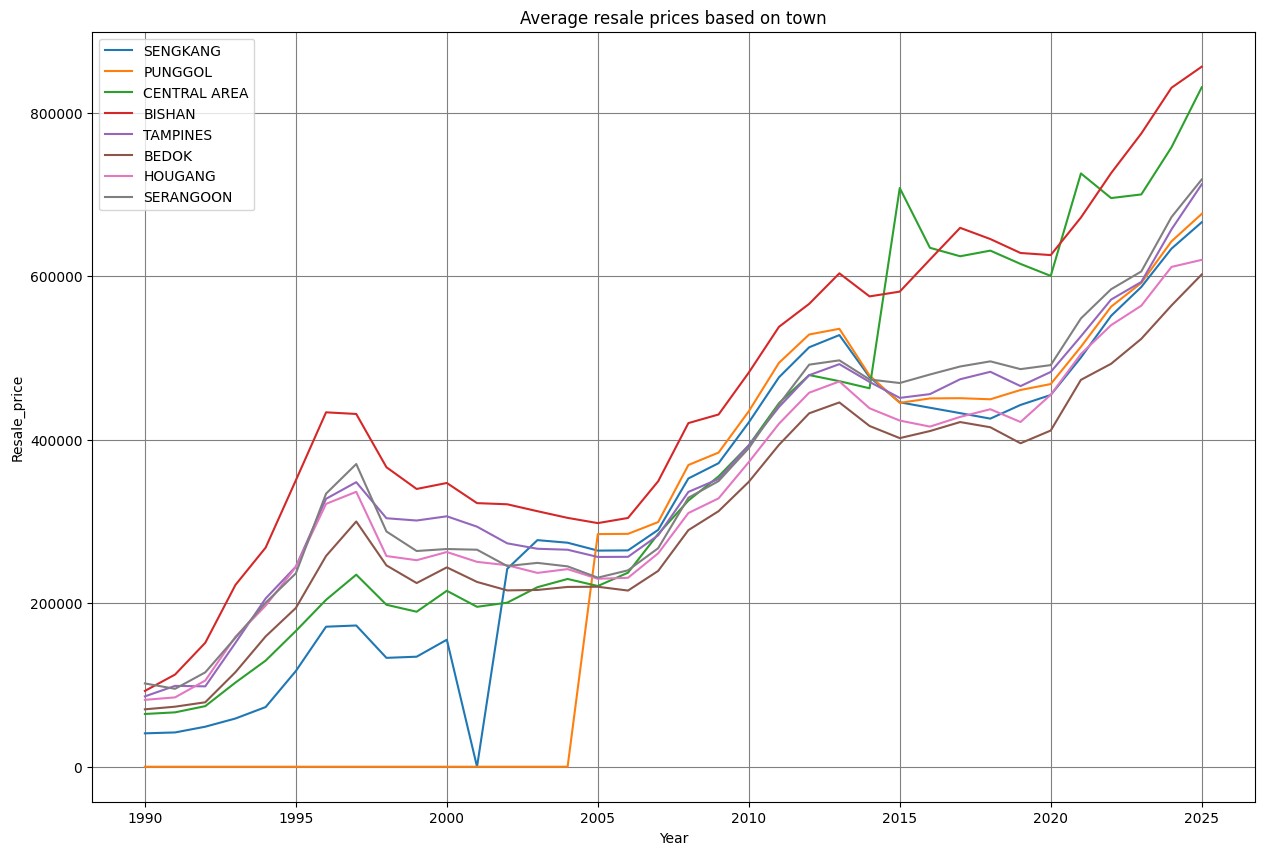

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
towns = ["SENGKANG", "PUNGGOL", "CENTRAL AREA", "BISHAN", "TAMPINES", "BEDOK", "HOUGANG", "SERANGOON"]
for t in towns:
    sns.lineplot(data=resale_town, x="year", y=t, ax=ax, label=t)
ax.legend()
ax.grid(True, color="grey")
ax.set_title("Average resale prices based on town")
ax.set_xlabel("Year")
ax.set_ylabel("Resale_price")


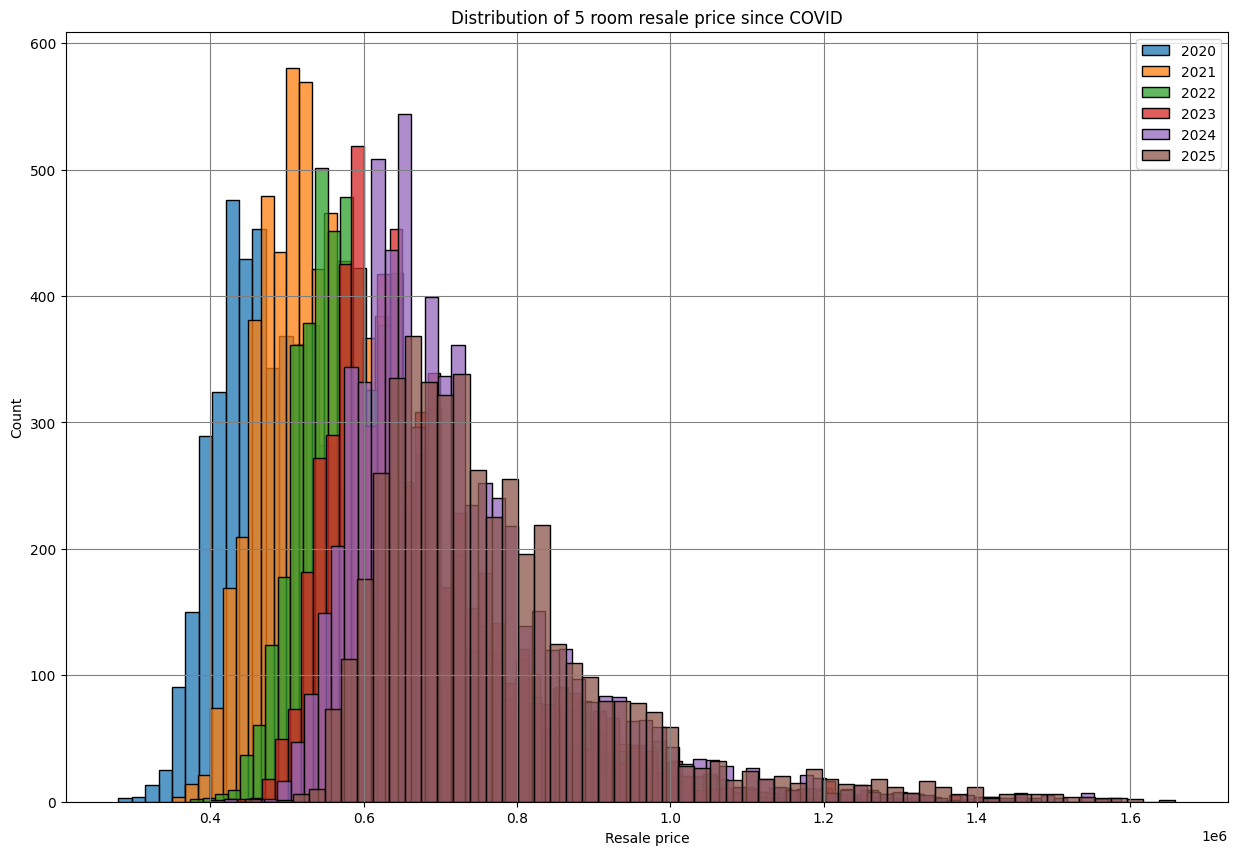

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
filter_years = [2020, 2021, 2022, 2023, 2024, 2025]
for y in filter_years: 
    filter_cond = (resale_df["year"] == y) & (resale_df["flat_type"] == "5 ROOM")
    df = resale_df[filter_cond]
    sns.histplot(data=df, x="resale_price", ax=ax, label=f"{y}", multiple="stack")

ax.legend() 
ax.set_title("Distribution of 5 room resale price since COVID")
ax.set_xlabel("Resale price")
ax.grid(True, color="grey")


In [29]:
cpi_file = "../config/static/cpi.yaml"
with open(cpi_file, "r") as f: 
    cpi_data = yaml.load(f, Loader=yaml.SafeLoader)

In [30]:
cpi_df = pd.DataFrame(cpi_data)

In [31]:
cpi_df = cpi_df.transpose()
cpi_df["year"] = cpi_df.index
cpi_df = cpi_df[["year", "cpi"]]
cpi_df.reset_index(drop=True, inplace=True)
cpi_df

,year,cpi
0,1990,54.195
1,1991,55.439
2,1992,56.865
3,1993,58.945
4,1994,59.755
5,1995,60.338
6,1996,60.897
7,1997,62.676
8,1998,64.291
9,1999,63.477


Text(0.5, 1.0, 'CPI between 1990-2025')

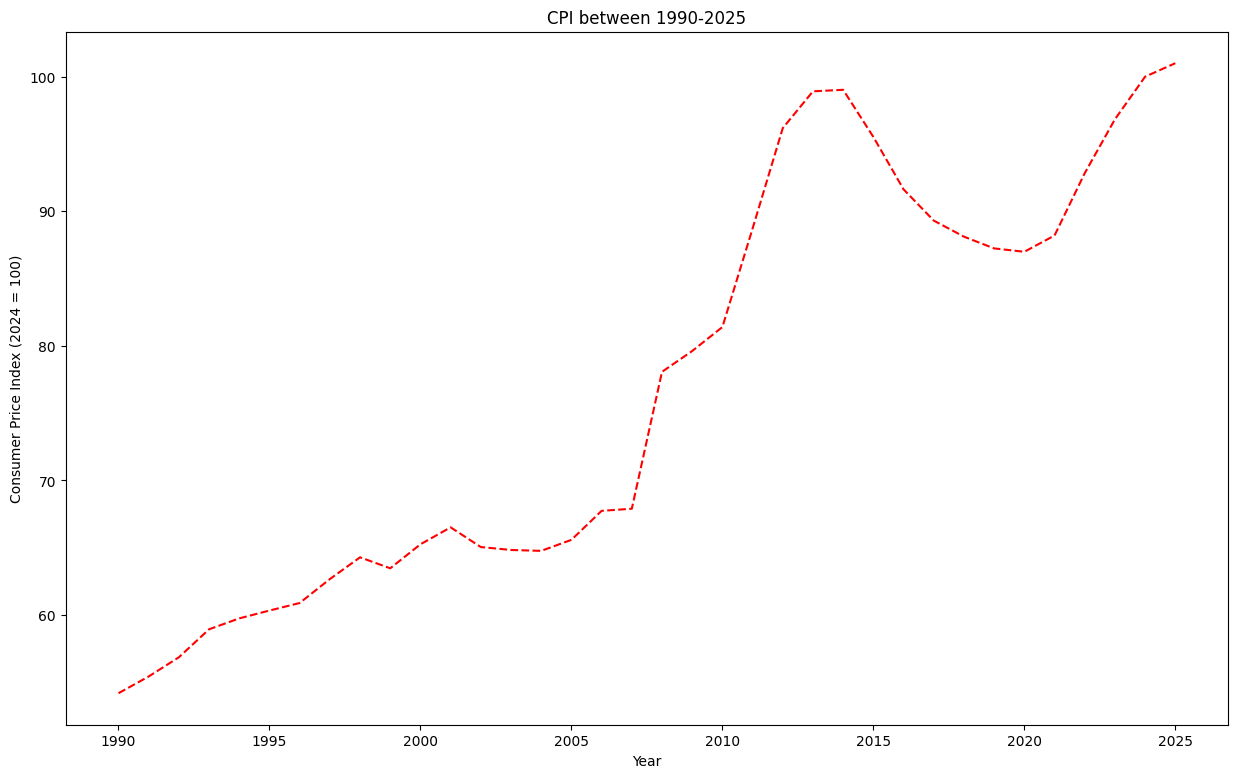

In [32]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=cpi_df, x="year", y="cpi", ax=ax, linestyle="--", color="red", linewidth=1.5)
ax.set_xlabel("Year")
ax.set_ylabel("Consumer Price Index (2024 = 100)")
ax.set_title("CPI between 1990-2025")

In [33]:
resale_df = pd.merge(resale_df, cpi_df, on="year", how="inner")

In [34]:
resale_df["resale_prices_inflation_adjusted"] = 100*resale_df["resale_price"]/resale_df["cpi"]

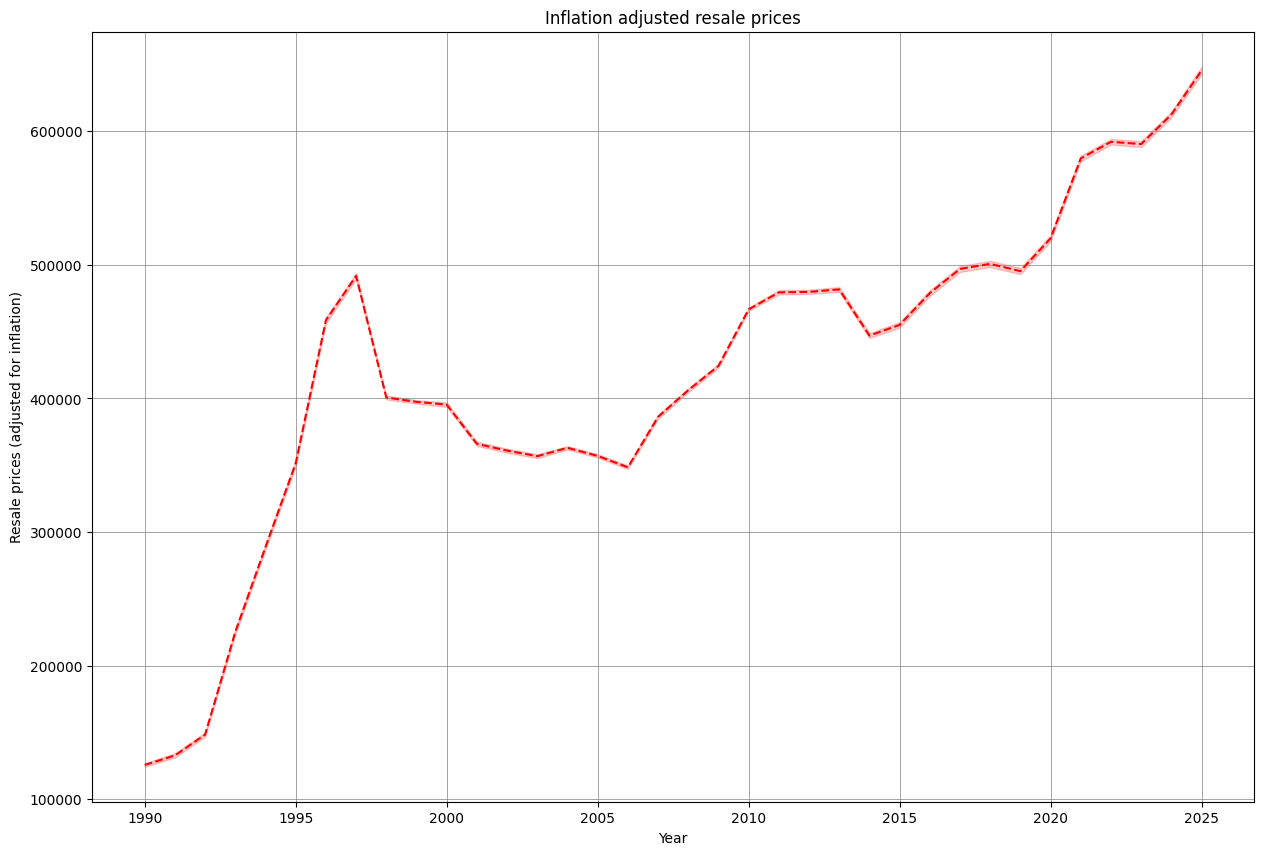

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=resale_df, x="year", y="resale_prices_inflation_adjusted", errorbar="ci", color="red", linestyle="--", linewidth=1.5, ax=ax)
ax.set_title("Inflation adjusted resale prices")
ax.set_xlabel("Year") 
ax.set_ylabel("Resale prices (adjusted for inflation)")
ax.grid(True, color="grey", linewidth=0.5)

In [39]:
resale_flat_typ_adjusted = resale_df.pivot_table(index="year", columns="flat_type", values="resale_prices_inflation_adjusted", aggfunc="mean")
resale_flat_typ = resale_df.pivot_table(index="year", columns="flat_type", values="resale_price", aggfunc="mean")

Text(0, 0.5, 'Resale_price')

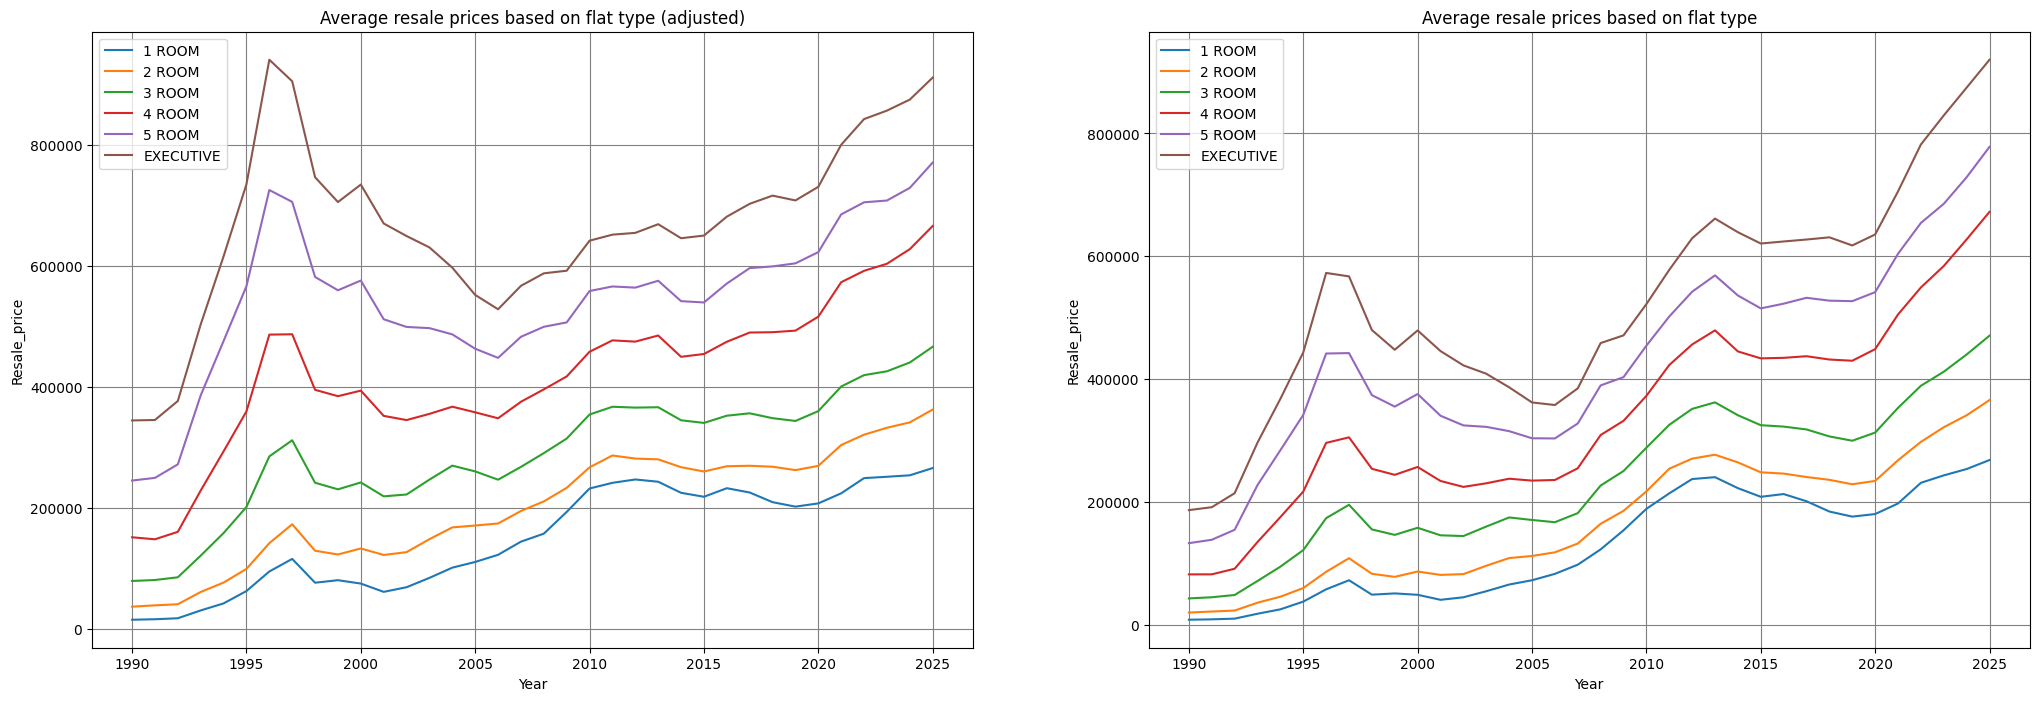

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(25, 8))
rooms = list(resale_flat_typ.columns)[0:-2]
for r in rooms:
    sns.lineplot(data=resale_flat_typ_adjusted, x="year", y=r, ax=axs[0], label=r)
axs[0].legend()
axs[0].grid(True, color="grey")
axs[0].set_title("Average resale prices based on flat type (adjusted)")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Resale_price")

for r in rooms:
    sns.lineplot(data=resale_flat_typ, x="year", y=r, ax=axs[1], label=r)
axs[1].legend()
axs[1].grid(True, color="grey")
axs[1].set_title("Average resale prices based on flat type")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Resale_price")